# eXploring the FordGoBike Dataset
## by Sebastien Hanicotte

## Preliminary Wrangling

> FordGoBike (aka Bay Wheels) is a regional public bicycle sharing system in the San Francisco Bay Area, California. They gracefully share a lot of their use data through a specific Data License Agreement (https://baywheels-assets.s3.amazonaws.com/data-license-agreement.html).

## DataSet Overview
The Dataset provided by Ford GoBike contains the following fields : 
- duration_sec
- start_time
- end_time
- start_station_id
- start_station_name
- start_station_latitude
- start_station_longitude
- end_station_id
- end_station_name
- end_station_latitude
- end_station_longitude
- bike_id
- user_type
- member_birth_year
- member_gender
- bike_share_for_all_trip
- rental_access_method


Some complementary data were added coming from another source given by Ford :
- station_type
- rental_methods
- region_id
- short_name
- station_id
- has_kiosk
- electric_bike_surcharge_waiver
- lon
- capacity
- external_id
- name
- rental_uris
- lat
- eightd_station_services
- eightd_has_key_dispenser

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns

sns.set(rc={'figure.figsize':(11,8)})

%matplotlib inline

#### Saving Master Data
I choose the `pickle` format to save the Master Data for multiple reasons : 
- This format is a compressed one, this mean that it will take less space to store on disk
- This format maintain the "object" information, when we load the `pickle` it will restore `datetime`, `category`, ... without having to parse and analyze the data again
- This format is rather fast to save and load (beware of the memory consumption on loading time)

In [2]:
# Loading back data already cleaned, tidied and ready to be analyzed ;-)

# Pickle format was used because it is more efficient to load huge amount of data and 
# maintain `type` of data like `boolean`, `category`, `datetime` (not garantied by CSV)
df = pd.read_pickle('data_master.pickle')

## How old are our bike users ?

Thanks to the field `member_birth_year` we can have a look at the age of our bike sharing service.

> Notice : This field has disappeared from the dataset since 2019-05 so the analyze is just for year between 2018-01 and 2019-04.

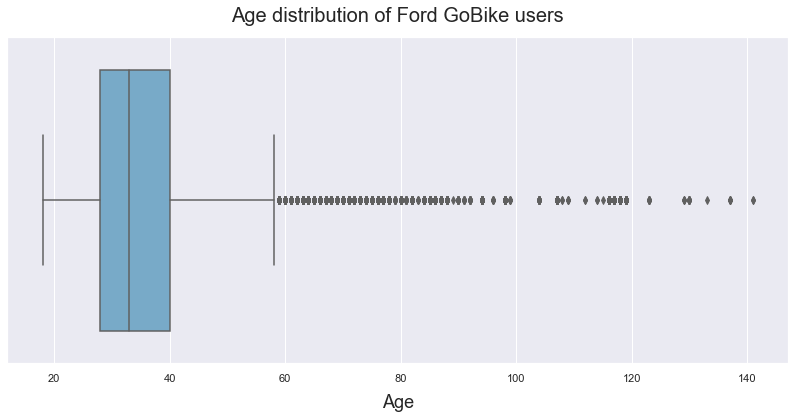

In [3]:
plt.figure(figsize=(14,6))
sns.boxplot(x='member_age', data=df, palette='Blues', orient='h')
plt.title("Age distribution of Ford GoBike users", fontsize=20, y=1.03)
plt.xlabel("Age", fontsize=18, labelpad=10)
plt.savefig('image01.png');

You will have certainly notice value over 100. We can consider that those values are out of bond, perhaps some "funny" users.

## Rides Distribution by Type of User
Bay Weels propose 2 kind of usage, either you use the system often and it is better that you become a `subscriber`, either you use it once in a while a you'll better stay a `customer`

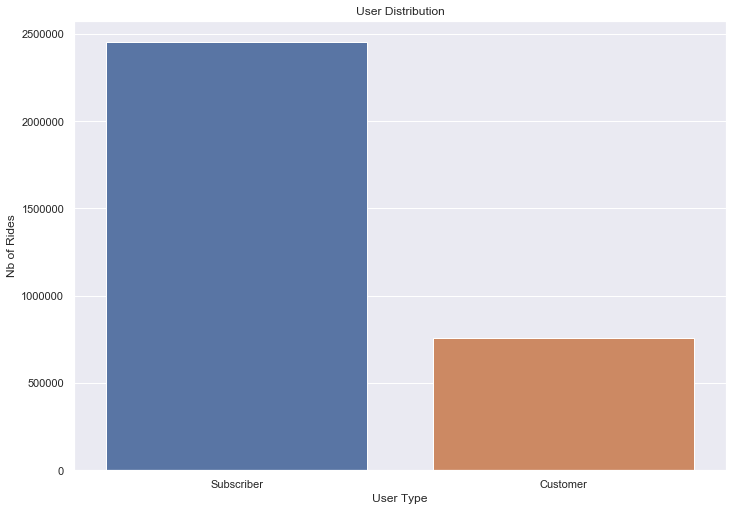

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.countplot(data=df, x='user_type');
plt.title('User Distribution');
plt.ylabel('Nb of Rides');
nodisp=plt.xlabel('User Type')

We see that there is far more rides done by `subscriber` than by `customers`. In my opinion, this behaviour is quite normal as you subscribe to this kind of service if you are planning to use the system frequently.

## Usage of the service through the year
Bike share service is available 24/7 all year long, but is there months/seasons where the service is more used ?


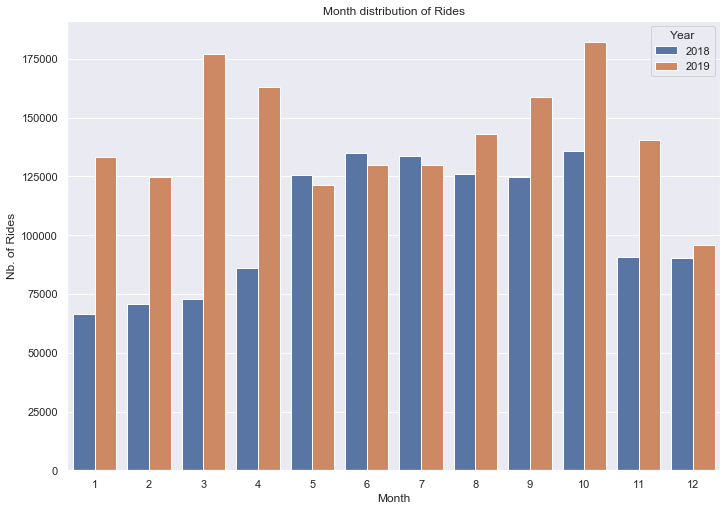

In [5]:
sns.countplot(data=df[df['start_time_year']<2020], x='start_time_month',hue='start_time_year');
plt.title('Month distribution of Rides');
plt.ylabel('Nb. of Rides');
plt.xlabel('Month')
nodisp=plt.legend(title='Year')

This graph shows that for both years `2018` and `2019`, there seems to be a seasonality of use of the service during `tempered` and `hot` days (`Spring`, `Summer` and `Automn`) rather than during `cold` days (`Winter`).

Difference between `2018` and `2019`, there was more travels during `Spring` and `Automn` `2019` than during `Summer` `2019` though the peak in `2018` was from `may` to `october` without a valley during `summer` (but amount of travels during those 2 summers is quite similar).

Both year have their major peak of use during the `October` month.

This picture also shows an increase of number of rides from `2018` to `2019` (except for the `summer` period).


## Are there days where the service is more used ?
To answer this question, I had to plot the number of rides vs the day of week. I also looked if the behaviour was dependant of the User Type.

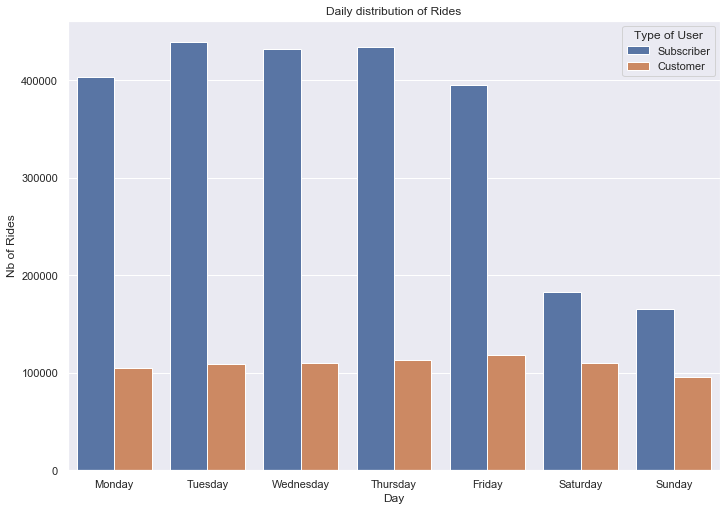

In [6]:
sns.countplot(data=df, x='start_time_dow', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], hue='user_type');
plt.title('Daily distribution of Rides');
plt.ylabel('Nb of Rides');
plt.xlabel('Day')
nodisp=plt.legend(title='Type of User')

It seems that the Bay Wheels service is mostly used during workdays (Monday to Friday) rather than during the week-end (Saturday and Sunday) for `subscribers`.

This behaviour differs for the `customers`. The `day of week` usage is more like a flat line (or a little curvy representation)

## Are there **rush** hours for the service ?
Is there some hours where the service is generating the most of the daily rides ?

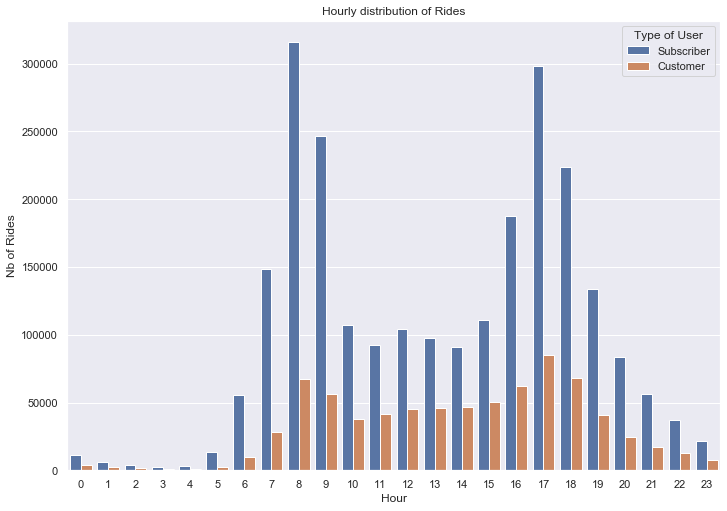

In [7]:
sns.countplot(data=df, x='start_time_hour', hue='user_type');
plt.title('Hourly distribution of Rides');
plt.ylabel('Nb of Rides');
plt.xlabel('Hour')
nodisp=plt.legend(title='Type of User')

The behaviour we expected seems to be confirmed. There are 2 peak of usage.

First peak is in the morning between 7AM to 9AM inclusive (with the most usage to be at 8AM).

The second peak is in the evening between 4PM to 6PM inclusive (with the most usage to be at 5PM).

Those periods are what may be called `work commute`.

Strangely, there is a similitude between `subscribers` and `customers` regarding the hour of the day usage.

Lastly, we can observe that rides during night (from 11PM to 5AM) are quite inexistant.

## What is the average duration ?
I also looked into duration vs number of rides to determine if there was an average duration.

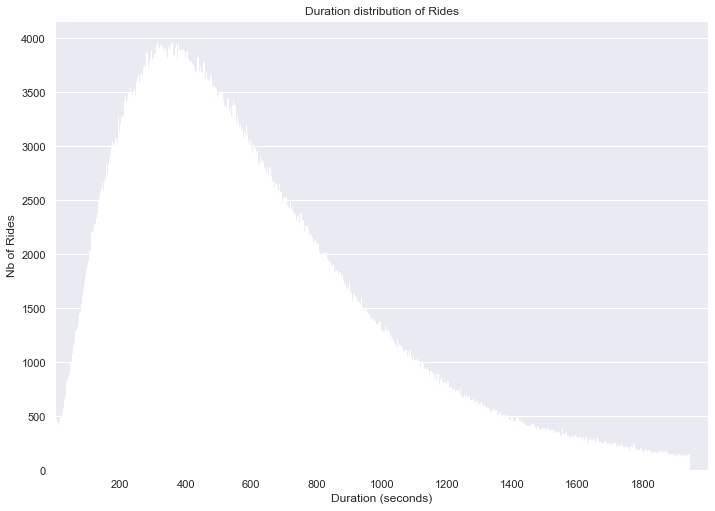

In [8]:
chart=sns.countplot(data=df[df['duration_sec']<=2000], x='duration_sec');
plt.title('Duration distribution of Rides');
plt.ylabel('Nb of Rides');
plt.xlabel('Duration (seconds)')
ticks = np.arange(0, 2000, 200)
plt.xticks(ticks, ticks);
nodisp=plt.xlim(1,2000)

The most of travels are between 2 minutes (120 seconds) to 12 minutes (720 seconds). So the users are doing mostly short travels rather than long rides with this service.

## What category of age are the users of the service ?
We should expect having relatively young users rather than over 40's. But will the graph confirm this behaviour ?

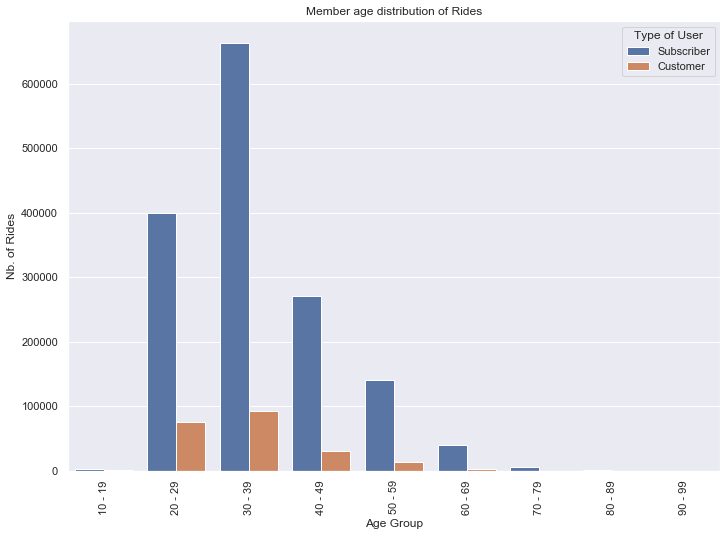

In [9]:
chart=sns.countplot(data=df, x='member_grouping_age', hue='user_type');
plt.title('Member age distribution of Rides');
plt.ylabel('Nb. of Rides');
plt.xlabel('Age Group')
chart.legend(title='Type of User')
#chart.figsize=(36,12)
#ticks = np.arange(18, df.member_age.max(), 5)
#plt.xticks(ticks, ticks);
nodisp=chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

Users of the service are rather young, into the grouping age 20-39 for the most rides.

#### What is the gender distribution of the system ?
Is there a specific attractivity between a gender for the service of bike sharing ?

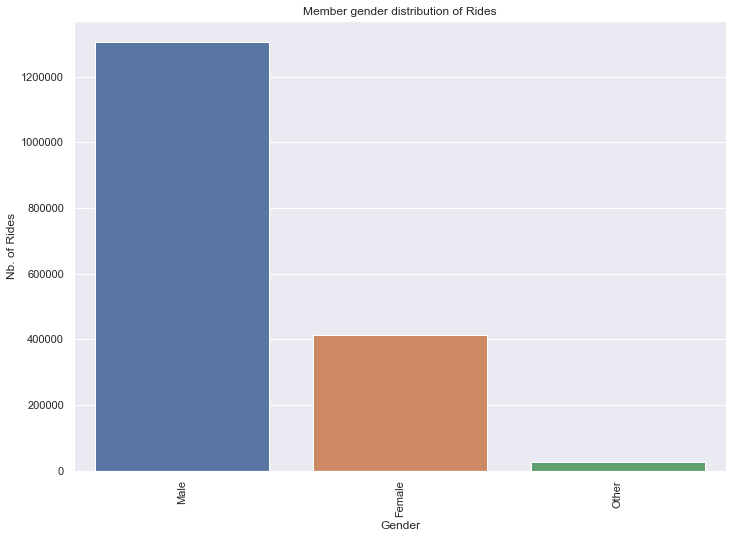

In [10]:
chart=sns.countplot(data=df, x='member_gender', order=['Male', 'Female', 'Other']);
plt.title('Member gender distribution of Rides');
plt.ylabel('Nb. of Rides');
plt.xlabel('Gender')
nodisp=chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

Male are doing the majority of all the rides done with the service, the ratio is here 1:3 with the Female Gender

## Where are the hotspot during rush hours ?
I'll try to show where are the hot spots during 2 period of the day we labeled `work commute` (ie. 8AM and 5PM)

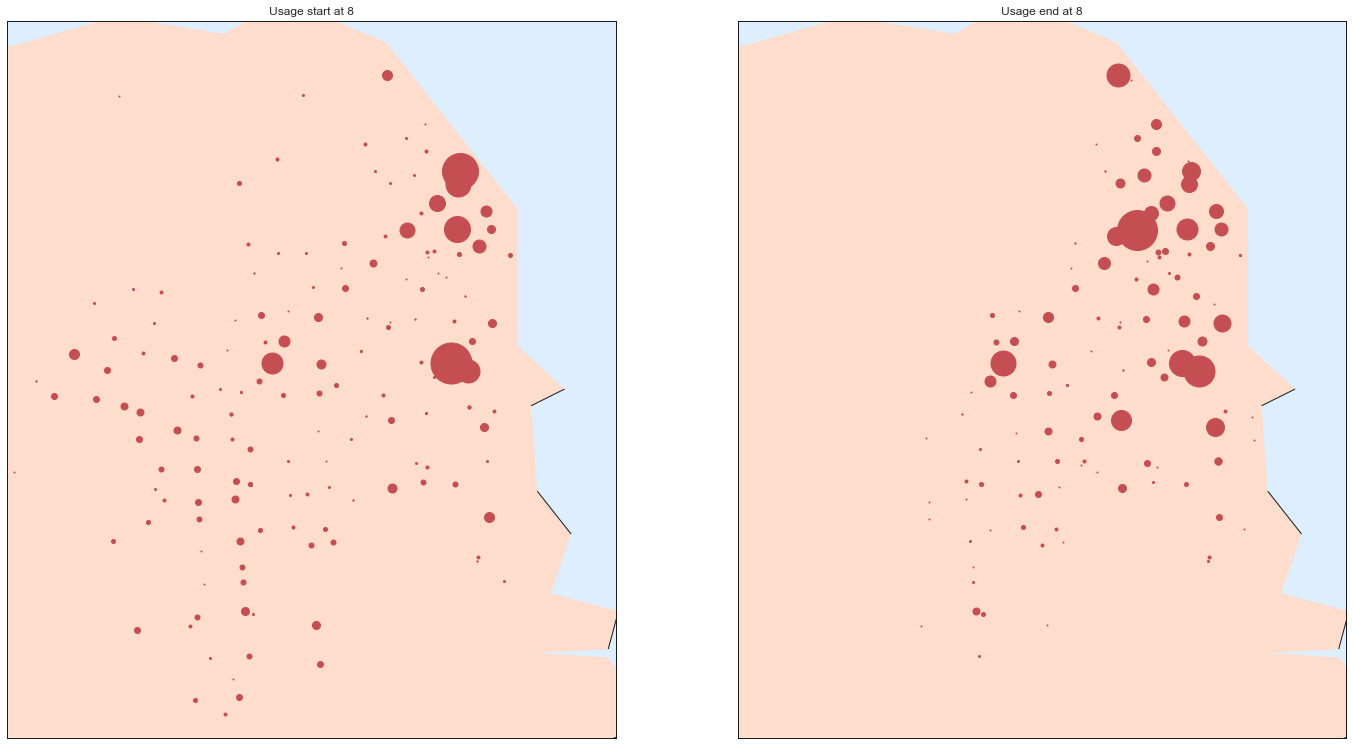

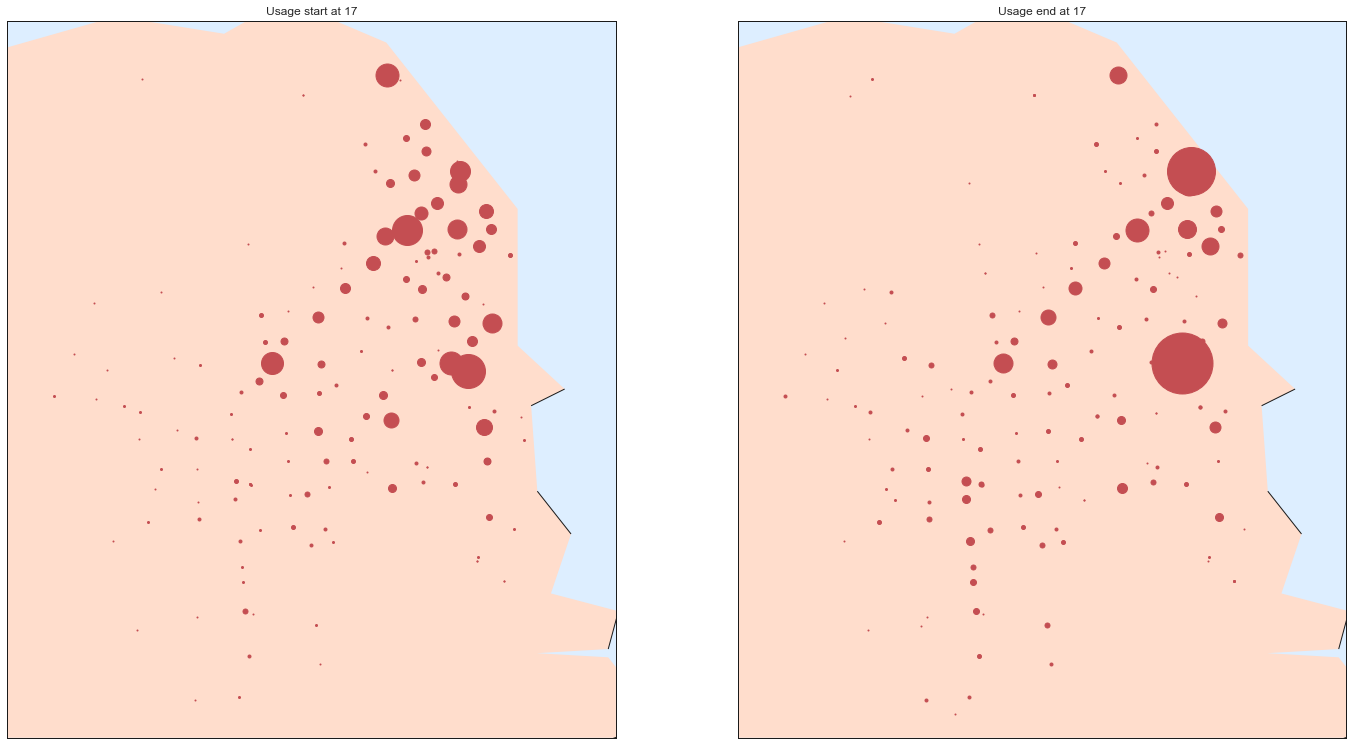

In [11]:
import warnings
from mpl_toolkits.basemap import Basemap
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(1, 2, figsize=(24, 16))
fig2, ax2 = plt.subplots(1, 2, figsize=(24, 16))

def drawMap(df, travelPosition: str, hour: int, axIn):
    """
        This function will help us to draw a map of the hot spots
        for the area of San Francisco Bay (region 3)
        
        Parameters:
        -----------
            - df: Dataframe. The dataframe containing datas we need to draw the map
            - travelPosition: str. Travel Position will determine whether you begin your travel `start` or
                you are at the `end`. These are the only 2 values authorized (`start`, `end`)
            - hour: int. The hour of the day you want the hot spot graph (between 0 and 23 inclusive)
        
        Returns:
        --------
            Display a map of hot spots for the specific hour and position in the travel
    """
    valid = {'start', 'end'}
    if dayPeriod not in valid:
        raise ValueError("error: param dayPeriod must be one of %r." % valid)
    if ((hour < 0) | (hour > 23)):
        raise ValueError("error: param hour must be between 0 and 23 inclusive.")
    df_stations = df[df[f'{dayPeriod}_time_hour']==hour].groupby([f'{dayPeriod}_station_longitude', f'{dayPeriod}_station_latitude']).count().reset_index()

    m = Basemap(projection='gnom', lat_0=37.804444, lon_0=-122.270833, 
            llcrnrlon=-122.45, llcrnrlat=37.74, 
            urcrnrlon=-122.375, urcrnrlat=37.81,
            resolution='h', ax=axIn
           )
    
    m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
    m.drawmapboundary(fill_color="#DDEEFF")
    m.drawcoastlines()
    axIn.set_title(f'Usage {dayPeriod} at {hour}')
    
    for ind in df_stations.index: 
        x,y = m(df_stations[f'{dayPeriod}_station_longitude'][ind], df_stations[f'{dayPeriod}_station_latitude'][ind]) 
        m.plot(x, y, 'ro', markersize=int(df_stations['bike_id'][ind]/400))


for i, dayPeriod in enumerate(['start', 'end']):    
    drawMap(df, dayPeriod, 8, ax[i])

for i, dayPeriod in enumerate(['start', 'end']):    
    drawMap(df, dayPeriod, 17, ax2[i])


As previsible, the `start 8AM` looks similar do the `end 5PM` and the `end 8AM` to the `start 5PM`.
We can also see that people comes from the suburb area (South West) to the center and north east area. I do not clearly know how SF is build, but it looks like suburban areas in South West are mainly Residencial zone and the hot spots we see in `end 8AM` should be the Financial Zone.

Before dealing with all other information, I'll cut the dataset to all travels below 2000 seconds as we have seen that it was the most representative of the lot.

In [12]:
df = df[df['duration_sec']<=2000]

## Is there relation between Gender and Duration ?
In order to make gender specific promotion campaign, it could be usefull to look if there is a tendance of use specific to a gender.


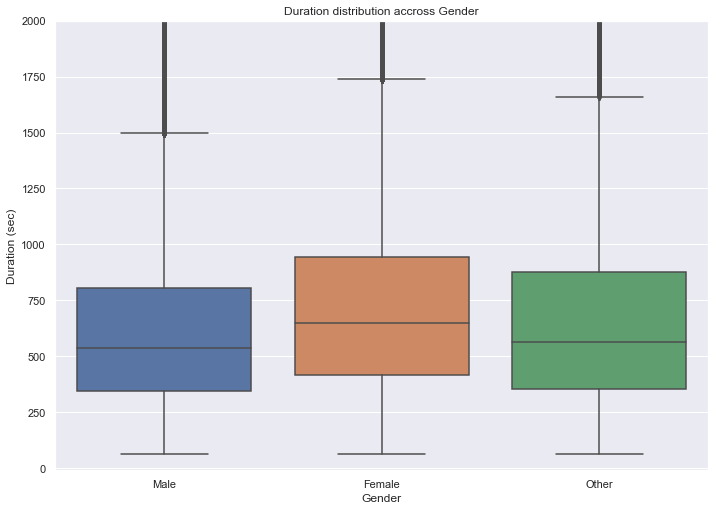

In [13]:
sns.boxplot(data = df, x = 'member_gender', y = 'duration_sec')
plt.ylim([-10, 2000])
plt.title('Duration distribution accross Gender');
plt.xlabel('Gender')
plt.ylabel('Duration (sec)')
plt.show()

We saw that there was more men using the service than female or other, but it looks like here than women and other are getting longer travels than men.

## Is there a relation between Type of User and Duration ?
Like we did with the gender, let's have a look with the Type of User. Depending of the result, a `subscription` campaign could be performed in order to increase fidelity from our users.

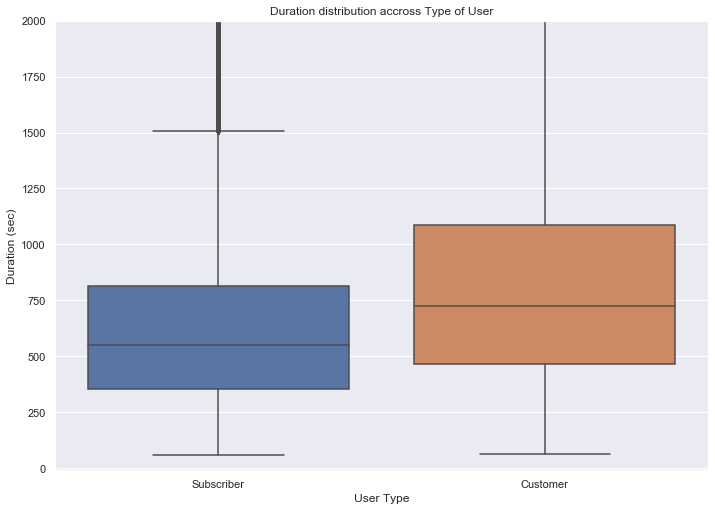

In [14]:
sns.boxplot(data = df, x = 'user_type', y = 'duration_sec')
plt.ylim([-10, 2000])
plt.title('Duration distribution accross Type of User');
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.show()

Once again, subscriber were the most users of the service, but we can see here that customers are traveling longer with the bike than subscribers. This could be explained by a lot of scenarios (like subscribers are accustomed to the traffic or itinary and customers to do the same distance, may be more cautionous or slow, or that customers are more likely to use the service to `visit` and by so they take their time)

## Number of Rides people took across the months, grouped by age
For this last slide, let's have a look on the distribution of rides between group of age and through the months.

We can notice that the usage of the service seems not to be influenced by the age as all behave the same.

Service usage increase steadily from January 2018 until October 2018 and then decreased abruptly (perhaps because of the weather during November 2018).

Then, since December 2018, the service usage continue growing.

The analyze stopped on April 2019 because we do not have anymore the possibility to know the age of our users (the field was no more proposed in the dataset).

There are still a lot question to answer and I reach the limit of the dataset information to answer them.

- What are the average number of rides a subscriber does ?
- What is the impact of the electric bikes slowly replacing the mecanical bikes ?
- Is the increase of rides after December 2018 the result of a campaign ? promotion ?



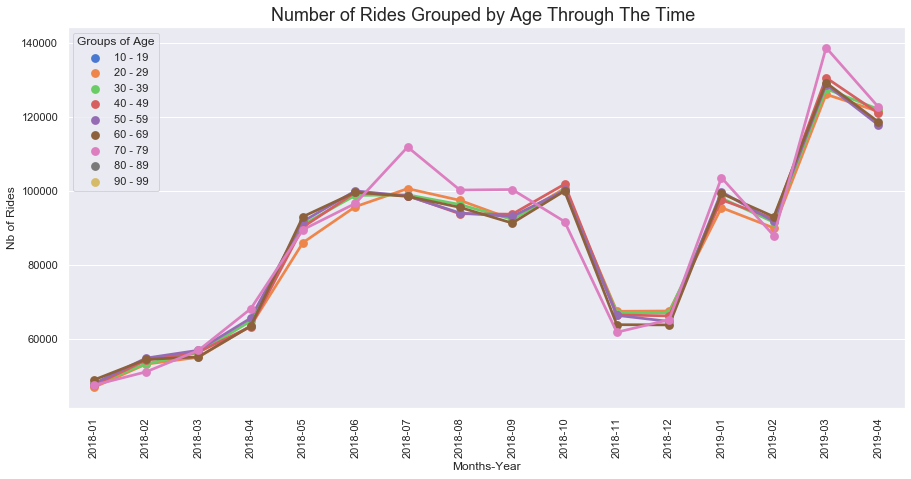

In [15]:
df_sub = df.loc[df['member_grouping_age'].isin(['20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79'])]
plt.figure(figsize = (15, 7))
#plt.style.use('seaborn')
chart=sns.pointplot(data = df_sub.sort_values(by=['start_time_yearmonth']), x='start_time_yearmonth', y = 'index',
             hue = 'member_grouping_age', palette = 'muted', ci = None);
plt.title('Number of Rides Grouped by Age Through The Time ', fontsize = 18);
plt.legend(title = 'Groups of Age');
plt.xlabel('Months-Year');
plt.ylabel('Nb of Rides');
nodisp=chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

## Time for questions